In [159]:
import os
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
# Load the training data
X = pd.read_csv("dataset/data_X.csv", encoding='big5').values #shape: (500, 8)
X = X[:, 1:] #shape: (500, 7)
X = X.astype(float)
X = np.array(X)
print(X.shape)


Y = pd.read_csv("dataset/data_T.csv", encoding='big5').values
Y = Y[:, 1:]
Y = np.array(Y).reshape(500,)
print(Y.shape)

(500, 7)
(500,)


In [161]:
# scaling
maxnum = np.max(X, axis=0)
minnum = np.min(X, axis=0)
x_data = (X - minnum) / (maxnum - minnum + 1e-20)
print(x_data)

[[0.94       0.92857143 0.75       ... 0.875      0.91346154 1.        ]
 [0.68       0.53571429 0.75       ... 0.875      0.66346154 1.        ]
 [0.52       0.42857143 0.5        ... 0.625      0.38461538 1.        ]
 ...
 [0.8        1.         1.         ... 1.         0.88461538 1.        ]
 [0.44       0.39285714 0.75       ... 1.         0.5224359  0.        ]
 [0.74       0.75       0.75       ... 0.875      0.71794872 0.        ]]


In [162]:
# Gradient Descent M=1
# ydata = b + w*xdata
b = 0.0
w = np.ones(7)
lr = 1
epoch = 20000
b_lr = 0.0
w_lr = np.zeros(7)


In [163]:
for e in range(epoch):
  # Calculate the value of the loss function
  error = Y - b - np.dot(x_data, w) #shape: (500,)
  loss = np.mean(np.square(error)) # Mean Square Error

  # Calculate gradient
  b_grad = -2*np.sum(error)*1 #shape: ()
  w_grad = -2*np.dot(error, x_data) #shape: (7,)
  
  # update learning rate
  b_lr = b_lr + b_grad**2
  w_lr = w_lr + w_grad**2

  # update parameters.
  b = b - lr/np.sqrt(b_lr) * b_grad
  w = w - lr/np.sqrt(w_lr) * w_grad

  # Print "Root Mean Square Error" per 2000 epoch
  if (e+1) % 2000 == 0:
    print('epoch:{}\n Loss:{}'.format(e+1, np.sqrt(loss)))
print("w: ",w)
print("b: ",b)

epoch:2000
 Loss:0.059504220823631375
epoch:4000
 Loss:0.05950420877785124
epoch:6000
 Loss:0.05950420877764954
epoch:8000
 Loss:0.05950420877764953
epoch:10000
 Loss:0.05950420877764953
epoch:12000
 Loss:0.05950420877764953
epoch:14000
 Loss:0.05950420877764953
epoch:16000
 Loss:0.05950420877764953
epoch:18000
 Loss:0.05950420877764953
epoch:20000
 Loss:0.05950420877764953
w:  [0.09292532 0.07778323 0.02376547 0.00634455 0.06743497 0.36936137
 0.02430748]
b:  0.34821986902755603


In [164]:
# Gradient Descent M=2
# ydata = b + w2*xdata + w1*xdata^2
b = 0.0
w1 = np.ones(7)
w2 = np.ones(7)
lr = 1
epoch = 20000
b_lr = 0.0
w1_lr = np.zeros(7)
w2_lr = np.zeros(7)

In [167]:
plt_loss =[]
plt_epoch = []
for e in range(epoch):
  # Calculate the value of the loss function
  x_data_square = np.square(x_data) #shape: (500,7)
  error = Y - b - np.dot(x_data, w2) - np.dot(x_data_square, w1) #shape: (500,)
  loss = np.mean(np.square(error)) # Mean Square Error

  # Calculate gradient
  b_grad = -2*np.sum(error)*1 #shape: ()
  w1_grad = -2*np.dot(error, x_data_square) #shape: (7,)
  w2_grad = -2*np.dot(error, x_data) #shape: (7,)
  
  # update learning rate
  b_lr = b_lr + b_grad**2
  w1_lr = w1_lr + w1_grad**2
  w2_lr = w2_lr + w2_grad**2

  # update parameters.
  b = b - lr/np.sqrt(b_lr) * b_grad
  w1 = w1 - lr/np.sqrt(w1_lr) * w1_grad
  w2 = w2 - lr/np.sqrt(w2_lr) * w2_grad

  plt_loss.append(np.sqrt(loss))
  plt_epoch.append(e)

  # Print "Root Mean Square Error" per 1000 epoch
  if (e+1) % 2000 == 0:
    print('epoch:{}\n Loss:{}'.format(e+1, np.sqrt(loss)))

print("w1: ",w1)
print("w2: ",w2)
print("b: ",b)

epoch:2000
 Loss:0.059039211771226806
epoch:4000
 Loss:0.059038835671637986
epoch:6000
 Loss:0.05903859268360227
epoch:8000
 Loss:0.059038435591609636
epoch:10000
 Loss:0.05903833399516439
epoch:12000
 Loss:0.059038268276338304
epoch:14000
 Loss:0.05903822576043162
epoch:16000
 Loss:0.05903819825341032
epoch:18000
 Loss:0.05903818045607411
epoch:20000
 Loss:0.05903816894066609
w1:  [-0.01851845 -0.04820637  0.08139181  0.02149234 -0.00470777 -0.08379753
  0.01244561]
w2:  [ 0.111644    0.13424626 -0.06327941 -0.01464704  0.07128418  0.45882721
  0.01244561]
b:  0.32919061576409986


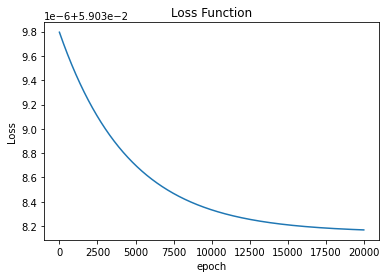

In [168]:
plt.plot(plt_epoch, plt_loss)
plt.title('Loss Function')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [175]:
#calculate MAP theta
hypothesis = np.linspace(0, 1, 101)
theta_hat_1 = hypothesis[np.argmax(w1)]
theta_hat_2 = hypothesis[np.argmax(w2)]
print(theta_hat_1,theta_hat_2)

0.02 0.05


In [176]:
# Gradient Descent M=2 for Maximum a posterior approach
# ydata = b + w2*xdata + w1*xdata^2
b = 0.0
w1 = np.ones(7)
w2 = np.ones(7)
lr = 1
epoch = 20000
b_lr = 0.0
w1_lr = np.zeros(7)
w2_lr = np.zeros(7)

In [180]:
pltmap_loss =[]
pltmap_epoch = []
for e in range(epoch):
  # Calculate the value of the loss function
  x_data_square = np.square(x_data) #shape: (500,7)
  error = Y - b - theta_hat_1*np.dot(x_data, w2)- theta_hat_2*np.dot(x_data_square, w1)
  loss = np.mean(np.square(error)) # Mean Square Error

  # Calculate gradient
  b_grad = -2*np.sum(error)*1 #shape: ()
  w1_grad = -2*np.dot(error, x_data_square) #shape: (7,)
  w2_grad = -2*np.dot(error, x_data) #shape: (7,)
  
  # update learning rate
  b_lr = b_lr + b_grad**2
  w1_lr = w1_lr + w1_grad**2
  w2_lr = w2_lr + w2_grad**2

  # update parameters.
  b = b - lr/np.sqrt(b_lr) * b_grad
  w1 = w1 - lr/np.sqrt(w1_lr) * w1_grad
  w2 = w2 - lr/np.sqrt(w2_lr) * w2_grad

  pltmap_loss.append(np.sqrt(loss))
  pltmap_epoch.append(e)
  # Print "Root Mean Square Error" per 2000 epoch
  if (e+1) % 2000 == 0:
    print('epoch:{}\n MAP Loss:{}'.format(e+1, np.sqrt(loss)))


epoch:2000
 MAP Loss:0.059299922504985496
epoch:4000
 MAP Loss:0.05927349890374746
epoch:6000
 MAP Loss:0.05925087590137326
epoch:8000
 MAP Loss:0.05923119619268617
epoch:10000
 MAP Loss:0.059213856288005434
epoch:12000
 MAP Loss:0.05919842368600604
epoch:14000
 MAP Loss:0.05918458189042279
epoch:16000
 MAP Loss:0.05917209379455025
epoch:18000
 MAP Loss:0.05916077722045926
epoch:20000
 MAP Loss:0.059150488517141976


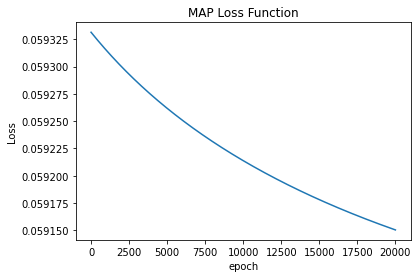

In [181]:
plt.plot(pltmap_epoch, pltmap_loss)
plt.title('MAP Loss Function')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()